<a href="https://colab.research.google.com/github/Mrmazenn1/ML-intern-at-Elevvo-/blob/main/CoverType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import kagglehub


In [ ]:
path = kagglehub.dataset_download("ilginkarakas/covtype")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'covtype' dataset.
Path to dataset files: /kaggle/input/covtype


In [ ]:
df = pd.read_csv(f"{path}/covtype.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [ ]:
df.shape

(581012, 55)

In [ ]:
df['Cover_Type'].value_counts()

,count
Cover_Type,
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


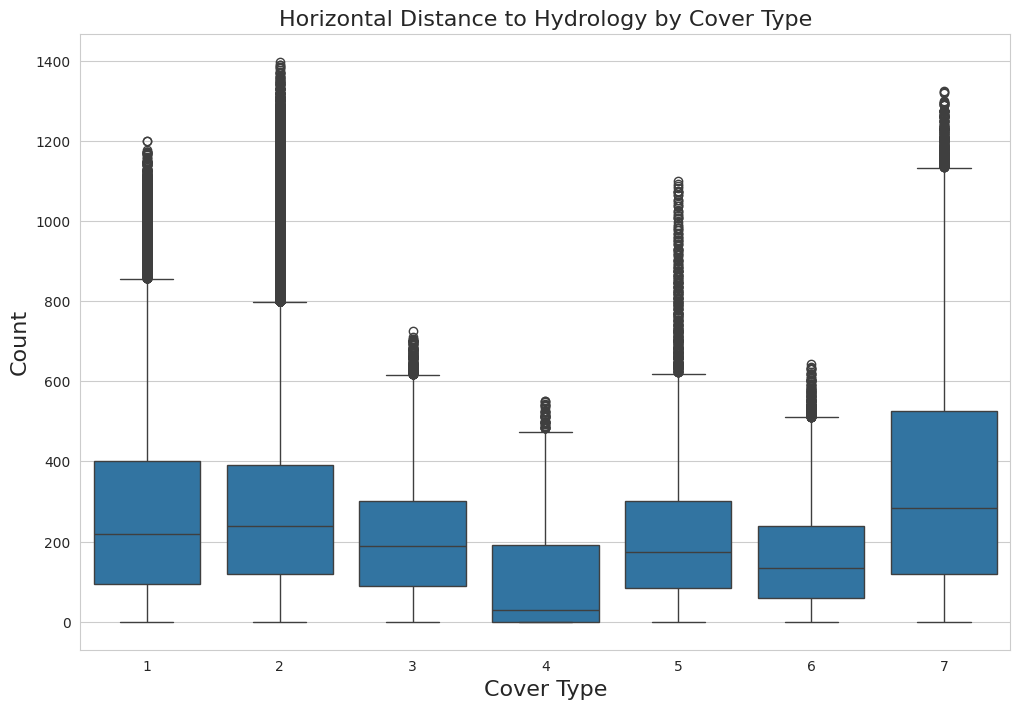

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cover_Type',y='Horizontal_Distance_To_Hydrology', data=df)
plt.title('Horizontal Distance to Hydrology by Cover Type',fontsize=16)
plt.xlabel('Cover Type',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

In [ ]:
x=df.drop('Cover_Type',axis=1)
y=df['Cover_Type']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [ ]:
numerical_features = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train[numerical_features] = scaler.fit_transform(x_train[numerical_features])
x_test[numerical_features] = scaler.transform(x_test[numerical_features])

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
print("training the model....")
model.fit(x_train, y_train)
print ("model trained successfully")

training the model....
model trained successfully


In [ ]:
feature_importances =pd.Series( model.feature_importances_, index=x.columns).sort_values(ascending=False)

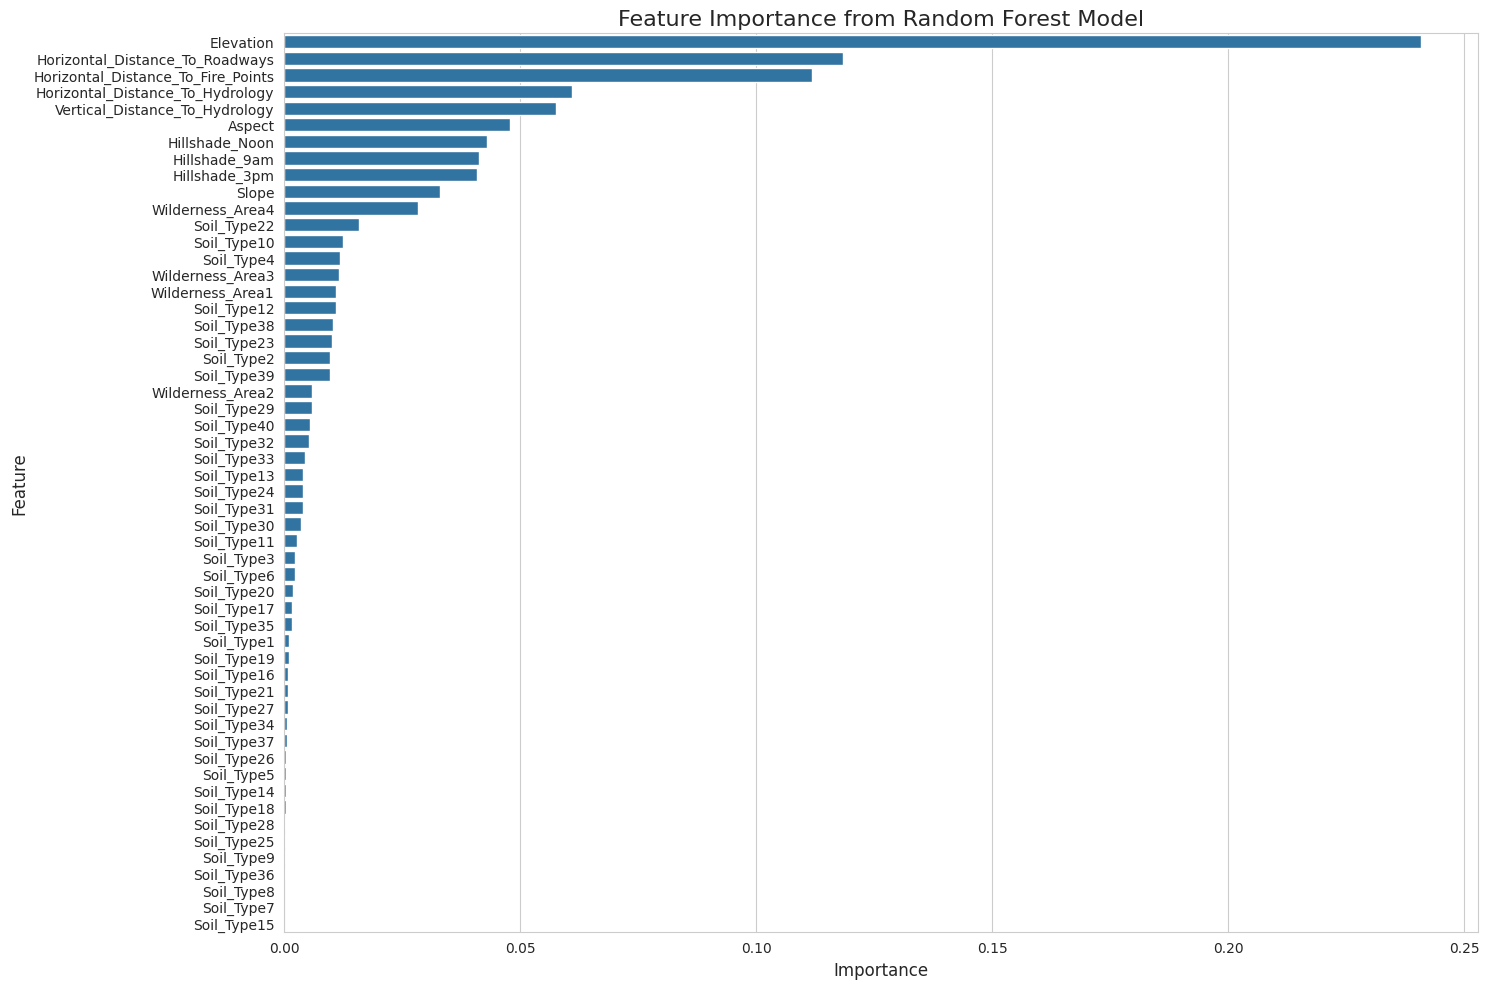

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print("\n--- Model Performance ---")
print(classification_report(y_test, y_pred))


--- Model Performance ---
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.94      0.90      0.92      3489
           7       0.97      0.96      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



In [ ]:
important_features = [
    'Elevation',
    'Horizontal_Distance_To_Roadways',
    'Horizontal_Distance_To_Fire_Points',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Aspect',
    'Hillshade_Noon',
    'Hillshade_9am',
    'Hillshade_3pm',
    'Slope',
    'Wilderness_Area1',
    'Wilderness_Area2',
    'Wilderness_Area3',
    'Wilderness_Area4'
]

In [ ]:
x = df[important_features]
y = df['Cover_Type']

In [ ]:
numerical_features_to_scale = [
    'Elevation',
    'Horizontal_Distance_To_Roadways',
    'Horizontal_Distance_To_Fire_Points',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Aspect',
    'Hillshade_Noon',
    'Hillshade_9am',
    'Hillshade_3pm',
    'Slope'
]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
x_train[numerical_features_to_scale] = scaler.fit_transform(x_train[numerical_features_to_scale])
x_test[numerical_features_to_scale] = scaler.transform(x_test[numerical_features_to_scale])


In [ ]:
print("Training a new Random Forest model with important features...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(x_train, y_train)
print("New model training complete!")

Training a new Random Forest model with important features...
New model training complete!


In [ ]:
y_pred = model.predict(x_test)
print("\n--- New Model Performance with Important Features Only ---")
print(classification_report(y_test, y_pred))


--- New Model Performance with Important Features Only ---
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.93      0.96      0.94      7151
           4       0.88      0.82      0.85       549
           5       0.95      0.74      0.83      1899
           6       0.93      0.88      0.90      3473
           7       0.98      0.94      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.94      0.89      0.91    116203
weighted avg       0.95      0.95      0.95    116203



In [ ]:
print("Training Random Forest Classifier (Baseline)...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("-" * 50)

Training Random Forest Classifier (Baseline)...
Random Forest Performance:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.93      0.95      0.94      7151
           4       0.86      0.81      0.84       549
           5       0.95      0.76      0.84      1899
           6       0.93      0.87      0.90      3473
           7       0.98      0.94      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.94      0.89      0.91    116203
weighted avg       0.95      0.95      0.95    116203

--------------------------------------------------


In [ ]:
print("Training XGBoost Classifier...")
y_train_xgb = y_train - 1
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y_train_xgb.unique()),
    eval_metric='merror',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(x_train, y_train_xgb)
y_pred_xgb = xgb_model.predict(x_test) + 1
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("-" * 50)

Training XGBoost Classifier...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:16:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance:
              precision    recall  f1-score   support

           1       0.85      0.83      0.84     42368
           2       0.86      0.89      0.87     56661
           3       0.88      0.90      0.89      7151
           4       0.86      0.85      0.86       549
           5       0.88      0.54      0.67      1899
           6       0.84      0.76      0.80      3473
           7       0.95      0.87      0.91      4102

    accuracy                           0.86    116203
   macro avg       0.87      0.81      0.83    116203
weighted avg       0.86      0.86      0.86    116203

--------------------------------------------------


In [ ]:
print("Starting Hyperparameter Tuning for Random Forest...")
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

Starting Hyperparameter Tuning for Random Forest...


In [ ]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

In [ ]:
print("Best hyperparameters found:", best_params)
print("Best cross-validation score:", grid_search.best_score_)

NameError: name 'best_params' is not defined

In [ ]:
tuned_model.fit(x_train, y_train)
y_pred_tuned = tuned_model.predict(x_test)

print("-" * 50)
print("Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred_tuned))